Forward Feature Selection for Classification Problem

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_loan = pd.read_csv("https://raw.githubusercontent.com/atulpatelDS/Data_Files/master/Loan_Dataset/loan_data_set.csv")


In [3]:
df_wine = pd.read_csv("https://raw.githubusercontent.com/atulpatelDS/Data_Files/master/wine_quality/winequality.csv")


In [4]:
df_loan.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [5]:
df_wine.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good,color
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,red
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0,red


In [6]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
# Remove all null value
df_loan.dropna(inplace=True)
# drop the uninformatica column("Loan_ID")
df_loan.drop(labels=["Loan_ID"],axis=1,inplace=True)
df_loan.reset_index(drop=True,inplace=True)

In [8]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             480 non-null    object 
 1   Married            480 non-null    object 
 2   Dependents         480 non-null    object 
 3   Education          480 non-null    object 
 4   Self_Employed      480 non-null    object 
 5   ApplicantIncome    480 non-null    int64  
 6   CoapplicantIncome  480 non-null    float64
 7   LoanAmount         480 non-null    float64
 8   Loan_Amount_Term   480 non-null    float64
 9   Credit_History     480 non-null    float64
 10  Property_Area      480 non-null    object 
 11  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 45.1+ KB


In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = df_loan.columns.tolist()
for column in cols:
    if df_loan[column].dtype == 'object':
        df_loan[column] = le.fit_transform(df_loan[column])

In [11]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  good                  6497 non-null   int64  
 13  color                 6497 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 710.7+ KB


In [12]:
#X = df_wine.iloc[:,0:-1]
#y = df_wine["color"]

In [13]:
X = df_loan.iloc[:,0:-1]
y = df_loan["Loan_Status"]

In [14]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
1,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2
2,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
3,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2
4,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2


In [15]:
print(X.shape)
print(y.shape)
print(type(X))
print(type(y))

(480, 11)
(480,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [17]:
# http://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector/
# Lets use the built in function in Python
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.linear_model import LogisticRegression as LGR
from sklearn.ensemble import RandomForestClassifier as rfc

In [18]:
feature_names=tuple(X.columns)
feature_names

('Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area')

In [19]:
X.shape, y.shape

((480, 11), (480,))

In [30]:
# Define your feature selection settings
sfs1 = SequentialFeatureSelector(
    estimator=LogisticRegression(max_iter=1000),
    k_features='best',
    forward=True,
    floating=False,
    verbose=2,
    scoring='accuracy',
    cv=0
)

# Fit the feature selection process
sfs1 = sfs1.fit(X, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s finished

[2023-08-25 18:54:54] Features: 1/11 -- score: 0.8083333333333333[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished

[2023-08-25 18:54:54] Features: 2/11 -- score: 0.8104166666666667[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s finished

[2023-08-25 18:54:55] Features: 3/11 -- score: 0.8104166666666667[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [24]:
# Via the subsets_ attribute, we can take a look at the selected feature indices at each step:
sfs1.subsets_

{1: {'feature_idx': (9,),
  'cv_scores': array([0.80833333]),
  'avg_score': 0.8083333333333333,
  'feature_names': ('Credit_History',)},
 2: {'feature_idx': (6, 9),
  'cv_scores': array([0.81041667]),
  'avg_score': 0.8104166666666667,
  'feature_names': ('CoapplicantIncome', 'Credit_History')},
 3: {'feature_idx': (0, 6, 9),
  'cv_scores': array([0.81041667]),
  'avg_score': 0.8104166666666667,
  'feature_names': ('Gender', 'CoapplicantIncome', 'Credit_History')},
 4: {'feature_idx': (0, 2, 6, 9),
  'cv_scores': array([0.81041667]),
  'avg_score': 0.8104166666666667,
  'feature_names': ('Gender',
   'Dependents',
   'CoapplicantIncome',
   'Credit_History')},
 5: {'feature_idx': (0, 2, 3, 6, 9),
  'cv_scores': array([0.81041667]),
  'avg_score': 0.8104166666666667,
  'feature_names': ('Gender',
   'Dependents',
   'Education',
   'CoapplicantIncome',
   'Credit_History')},
 6: {'feature_idx': (0, 1, 2, 3, 6, 9),
  'cv_scores': array([0.81041667]),
  'avg_score': 0.8104166666666667,
 

In [25]:
sfs1.get_metric_dict()

C:\Users\harik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\harik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


{1: {'feature_idx': (9,),
  'cv_scores': array([0.80833333]),
  'avg_score': 0.8083333333333333,
  'feature_names': ('Credit_History',),
  'ci_bound': nan,
  'std_dev': 0.0,
  'std_err': nan},
 2: {'feature_idx': (6, 9),
  'cv_scores': array([0.81041667]),
  'avg_score': 0.8104166666666667,
  'feature_names': ('CoapplicantIncome', 'Credit_History'),
  'ci_bound': nan,
  'std_dev': 0.0,
  'std_err': nan},
 3: {'feature_idx': (0, 6, 9),
  'cv_scores': array([0.81041667]),
  'avg_score': 0.8104166666666667,
  'feature_names': ('Gender', 'CoapplicantIncome', 'Credit_History'),
  'ci_bound': nan,
  'std_dev': 0.0,
  'std_err': nan},
 4: {'feature_idx': (0, 2, 6, 9),
  'cv_scores': array([0.81041667]),
  'avg_score': 0.8104166666666667,
  'feature_names': ('Gender',
   'Dependents',
   'CoapplicantIncome',
   'Credit_History'),
  'ci_bound': nan,
  'std_dev': 0.0,
  'std_err': nan},
 5: {'feature_idx': (0, 2, 3, 6, 9),
  'cv_scores': array([0.81041667]),
  'avg_score': 0.8104166666666667,
  

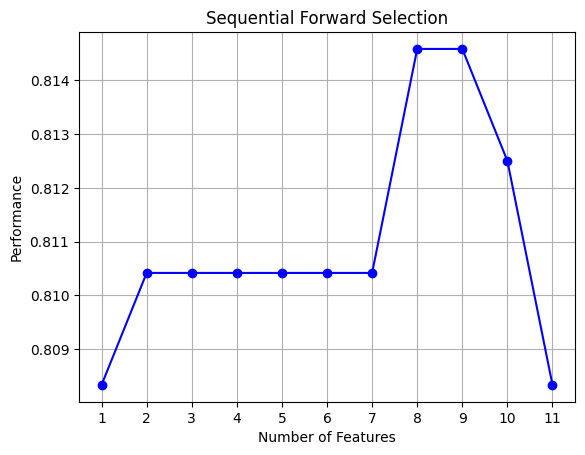

In [26]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
fig1 = plot_sfs(sfs1.get_metric_dict(confidence_interval=0.95), kind='std_err')

plt.title('Sequential Forward Selection')
plt.grid()
plt.show()

In [27]:
# Lets access the indices of the best features directly via the k_feature_idx_ attribute:
sfs1.k_feature_names_, sfs1.k_feature_idx_

(('Gender',
  'Married',
  'Dependents',
  'Education',
  'CoapplicantIncome',
  'LoanAmount',
  'Credit_History',
  'Property_Area'),
 (0, 1, 2, 3, 6, 7, 9, 10))

In [28]:
df = pd.DataFrame.from_dict(sfs1.get_metric_dict()).T
df[["feature_idx","avg_score"]]

,feature_idx,avg_score
1,"(9,)",0.808333
2,"(6, 9)",0.810417
3,"(0, 6, 9)",0.810417
4,"(0, 2, 6, 9)",0.810417
5,"(0, 2, 3, 6, 9)",0.810417
6,"(0, 1, 2, 3, 6, 9)",0.810417
7,"(0, 1, 2, 3, 6, 7, 9)",0.810417
8,"(0, 1, 2, 3, 6, 7, 9, 10)",0.814583
9,"(0, 1, 2, 3, 5, 6, 7, 9, 10)",0.814583
10,"(0, 1, 2, 3, 4, 5, 6, 7, 9, 10)",0.8125


Forward Feature Selection for Regression Problem

Selected Features : ('MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude')
Selected Features ID : (0, 1, 2, 3, 4, 5, 6, 7)


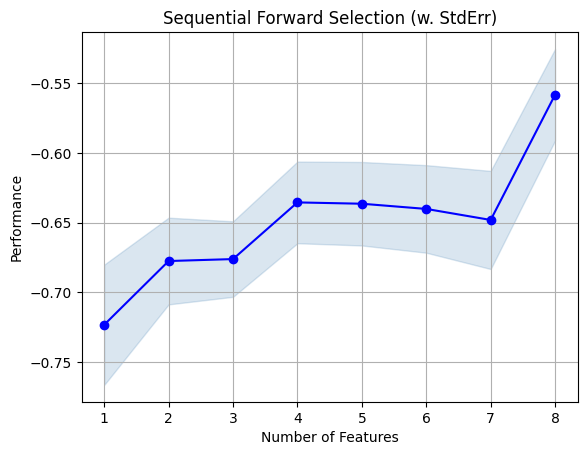

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

# Load the California housing dataset
data = fetch_california_housing(as_frame=True)
X = data.data
y = data.target

lr = LinearRegression()
sfs = SFS(lr, 
          k_features='best', 
          forward=True, 
          floating=False, 
          scoring='neg_mean_squared_error',
          cv=5)
sfs = sfs.fit(X, y)
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')
print("Selected Features :", sfs.k_feature_names_)
print("Selected Features ID :", sfs.k_feature_idx_)
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()



In [36]:
df = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
df[["feature_idx","avg_score"]]

,feature_idx,avg_score
1,"(0,)",-0.723153
2,"(0, 1)",-0.677476
3,"(0, 1, 2)",-0.676073
4,"(0, 1, 2, 3)",-0.635467
5,"(0, 1, 2, 3, 4)",-0.636414
6,"(0, 1, 2, 3, 4, 5)",-0.640142
7,"(0, 1, 2, 3, 4, 5, 6)",-0.648043
8,"(0, 1, 2, 3, 4, 5, 6, 7)",-0.55829
